# Data:
The datasets are reformatted from the 2022 American Community Survey (ACS) from the United States Census Bureau: https://data.census.gov/table?q=Disability

The disability_by_race dataset contains 9 observations and 3 variables:
<ol>
<li>Race: The race of the people</li>
<li>Disability: The number of disabled people</li>
<li>Total: The total number of people
</ol>
The disability_by_age dataset contains 7 observations and 3 variables:
<ol>
<li>Age Group: The age group of the people</li>
<li>Disability: The number of disabled people</li>
<li>Total: The total number of people
</ol>

## Disability by Race:

Let's calculate the percent of the people that are disabled (Disability Percent):
\begin{equation*}
\text{Disability Percent}
= \frac{\text{Number of Disabled People in Group}}{\text{Total Population of Group}}
\end{equation*}

In [1]:
disability_race_2022 <- read.csv("disability_race_2022.csv")
disability_race_2022$Disability_Percent <- disability_race_2022$Disability / disability_race_2022$Total
disability_race_2022$Disability_Percent <- disability_race_2022$Disability_Percent * 100

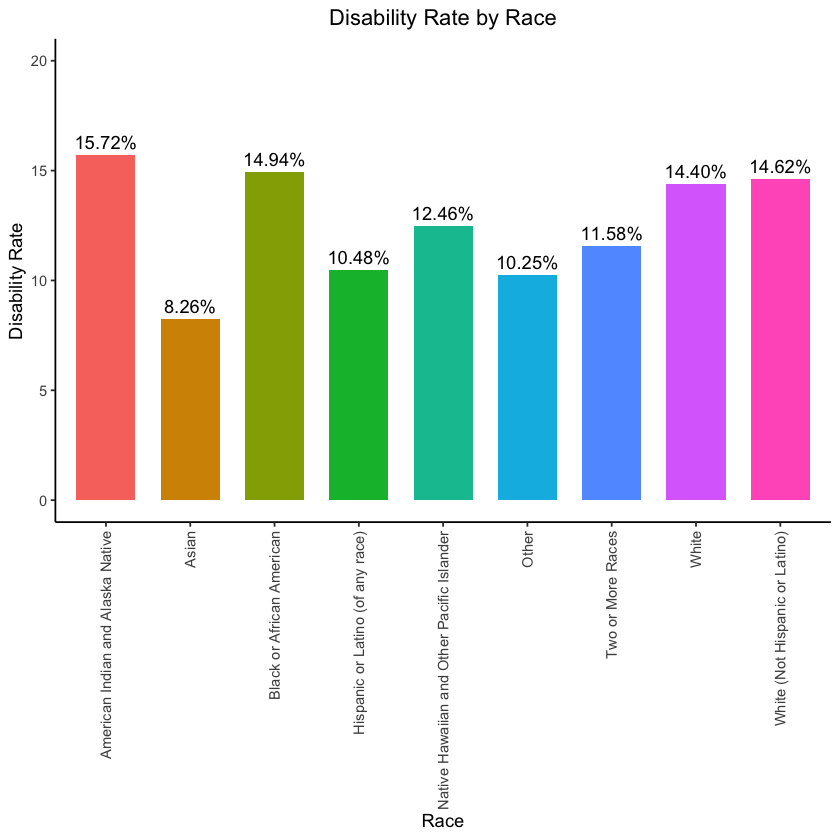

In [2]:
library(ggplot2)
ggplot(data = disability_race_2022, mapping = aes(x = Race, y = Disability_Percent, fill = Race)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  geom_text(mapping = aes(label = sprintf("%.2f%%", Disability_Percent)),
            position = position_dodge(width = 0.9),
            vjust = -0.5) +
  scale_y_continuous(limits = c(0, 20), breaks = seq(0, 20, 5)) +
  labs(x = "Race", y = "Disability Rate", title = "Disability Rate by Race") +
  theme_classic() +
  theme(legend.position = "none",
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
        plot.title = element_text(hjust = 0.5))

## Disability by Age Group:

Let's calculate the percent of the people that are disabled (Disability Percent):
\begin{equation*}
\text{Disability Percent}
= \frac{\text{Number of Disabled People in Group}}{\text{Total Population of Group}}
\end{equation*}

In [3]:
disability_age_2022 <- read.csv("disability_age_2022.csv")
disability_age_2022$Disability_Percent <- disability_age_2022$Disability / disability_age_2022$Total
disability_age_2022$Disability_Percent <- disability_age_2022$Disability_Percent * 100

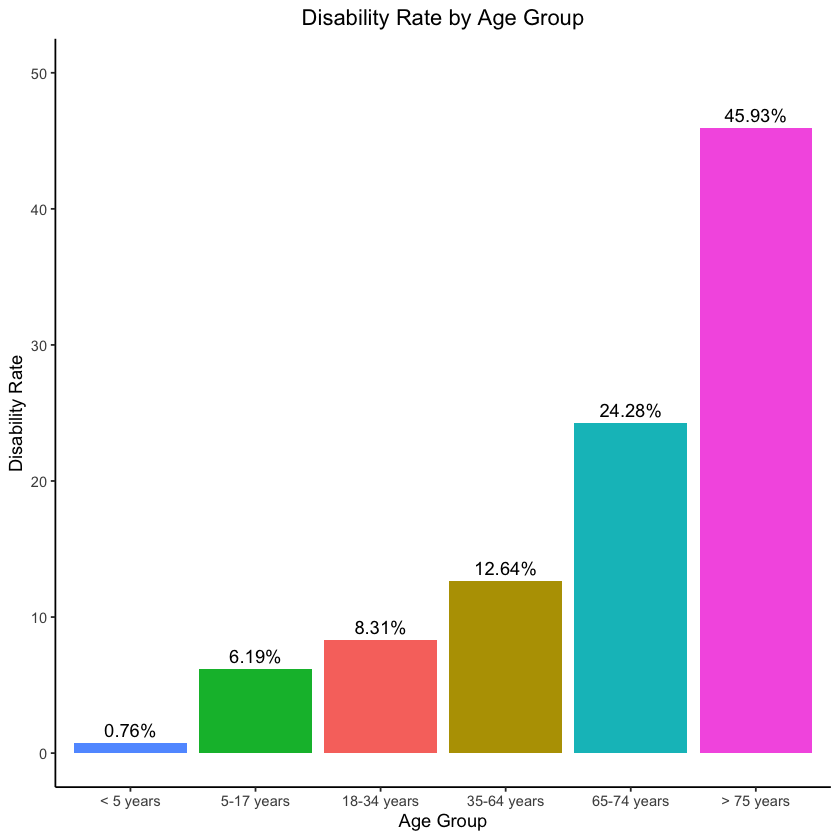

In [4]:
# Specify the order of the Age_Group variable
age_order <- factor(c("< 5 years", "5-17 years", "18-34 years", "35-64 years", "65-74 years", "> 75 years"), 
                    levels = c("< 5 years", "5-17 years", "18-34 years", "35-64 years", "65-74 years", "> 75 years"))

ggplot(data = disability_age_2022, mapping = aes(x = factor(Age_Group, levels = age_order), y = Disability_Percent, fill = Age_Group)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(mapping = aes(label = sprintf("%.2f%%", Disability_Percent)),
            position = position_dodge(width = 0.9),
            vjust = -0.5) +
  scale_y_continuous(limits = c(0, 50), breaks = seq(0, 50, 10)) +
  labs(x = "Age Group", y = "Disability Rate", title = "Disability Rate by Age Group") +
  theme_classic() +
  theme(legend.position = "none",
        plot.title = element_text(hjust = 0.5))